# MP0 : Image Demosaicing

Welcome to CS 543! This assignment is a warm-up assignment to get you back up working from the winter break! We will try to provide you an iPython Notebook (like this) for all the future assignments! The notebook will provide you some further instructions(implementation related mainly), in addition to the ones provided on class webpage.

### Import statements

The following cell is only for import statements. You can use any of the 3 : cv2, matplotlib or skimage for image i/o and other functions. We will provide you the names of the relevant functions for each module. __{For convenience provided at the end of the class assignment webpage}__

In [30]:
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import skimage
import scipy
from scipy.ndimage import correlate as conv
from scipy.signal import medfilt2d
%matplotlib inline

### Reading the Mosaic Image

In [31]:
IMG_DIR = 'images/'
IMG_NAME = 'crayons.bmp'

In [32]:
def read_image(IMG_NAME):
    # YOUR CODE HERE
    img = cv2.imread(IMG_NAME)
    return img

In [33]:
# For a sanity check, display your image here
mosaic_img = read_image(IMG_DIR + IMG_NAME)# YOUR CODE HERE
cv2.imshow('mosaic image', mosaic_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Linear Interpolation

In [34]:
### HINT : You might want to use filters

In [35]:
### HINT : To use filters you might want to write your kernels

In [36]:
### HINT : For writing your kernels you might want to see the RGB Pattern provided on the website

In [37]:
### HINT : To improve your kernels, you might want to use the squared difference 
###        between your solution image and the original image

In [38]:
def get_solution_image(mosaic_img):
    '''
    This function should return the soln image.
    Feel free to write helper functions in the above cells
    as well as change the parameters of this function.
    '''
    mosaic_shape = np.shape(mosaic_img)
    # soln_image = np.zeros((mosaic_shape[0], mosaic_shape[1], 3))
    ### YOUR CODE HERE ###

    # Make sure broadcast works correctly
    assert mosaic_shape[0] % 2 == 0 and mosaic_shape[1] % 2 == 0
    width_n = mosaic_shape[1] // 2
    height_n = mosaic_shape[0] // 2
    # Extract channels
    red_channel = mosaic_img * np.tile(np.array([[1, 0], [0, 0]]), \
                                       (height_n, width_n))
    green_channel = mosaic_img * np.tile(np.array([[0, 1], [1, 0]]), \
                                         (height_n, width_n))
    blue_channel = mosaic_img * np.tile(np.array([[0, 0], [0, 1]]), \
                                        (height_n, width_n))

    # Do conv for each channel
    red_channel = conv(red_channel, np.array([[0.25, 0.5, 0.25], \
                                              [0.5, 1, 0.5], [0.25, 0.5, 0.25]]),
                       output=np.dtype('uint8'), mode='mirror')
    green_channel = conv(green_channel, np.array([[0, 0.25, 0], \
                                                  [0.25, 1, 0.25], [0, 0.25, 0]]),
                       output=np.dtype('uint8'), mode='mirror')
    blue_channel = conv(blue_channel, np.array([[0.25, 0.5, 0.25], \
                                                [0.5, 1, 0.5], [0.25, 0.5, 0.25]]),
                       output=np.dtype('uint8'), mode='mirror')

    soln_image = np.array([blue_channel, green_channel, \
                           red_channel]).transpose((1, 2, 0))
    return soln_image

In [39]:
def compute_errors(soln_image, original_image):
    '''
    Compute the Average and Maximum per-pixel error
    for the image.

    Also generate the map of pixel differences
    to visualize where the mistakes are made
    '''
    err_map = ((soln_image.astype('float32') - original_image.astype('float32')) ** 2).sum(2)
    size = np.shape(err_map)[0] * np.shape(err_map)[1]
    pp_err = err_map.sum() / size
    max_err = err_map.max()
    err_map = np.sqrt(err_map).astype('uint16')
    print(err_map)
    plt.imshow(err_map, 'gray')
    plt.show()    
    return pp_err, max_err

We provide you with 3 images to test if your solution works. Once it works, you should generate the solution for test image provided to you.

In [40]:
mosaic_img = read_image(IMG_DIR + 'crayons.bmp')[:,:,0]
soln_image = get_solution_image(mosaic_img)
original_image = read_image(IMG_DIR + 'crayons.jpg')
# For sanity check display your solution image here
### YOUR CODE
cv2.imshow('crayons solution', soln_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[3 0 1 ... 1 2 1]
 [3 1 1 ... 1 1 0]
 [5 2 0 ... 1 0 2]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


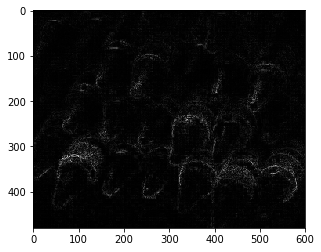

The average per-pixel error for crayons is: 143.5085
The maximum per-pixel error for crayons is: 53633.0


In [41]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for crayons is: "+str(pp_err))
print("The maximum per-pixel error for crayons is: "+str(max_err))

In [42]:
mosaic_img = read_image(IMG_DIR + 'iceberg.bmp')[:,:,0]
soln_image = get_solution_image(mosaic_img)
original_image = read_image(IMG_DIR + 'iceberg.jpg')
# For sanity check display your solution image here
### YOUR CODE
cv2.imshow('icerberg solution', soln_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[ 1  1  2 ...  1  0  1]
 [ 0  1  2 ...  1  0  0]
 [ 2  1  0 ...  1  0  0]
 ...
 [ 6  2  3 ...  0  1  2]
 [ 8  4  1 ...  1  0  1]
 [10  9  7 ...  1  1  2]]


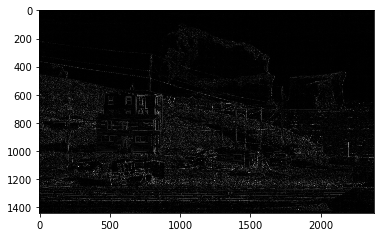

The average per-pixel error for iceberg is: 105.24663681313555
The maximum per-pixel error for iceberg is: 30186.0


In [43]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for iceberg is: "+str(pp_err))
print("The maximum per-pixel error for iceberg is: "+str(max_err))

In [44]:
mosaic_img = read_image(IMG_DIR + 'tony.bmp')[:,:,0]
soln_image = get_solution_image(mosaic_img)
original_image = read_image(IMG_DIR + 'tony.jpg')
# For sanity check display your solution image here
### YOUR CODE
cv2.imshow('tony solution', soln_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[34 30 33 ...  6  7  6]
 [13 15 14 ...  2  2  2]
 [ 1  1  1 ...  1  1  1]
 ...
 [ 4  2  2 ...  0  0  0]
 [ 2  0  3 ...  0  0  0]
 [ 6  5  5 ...  0  0  0]]


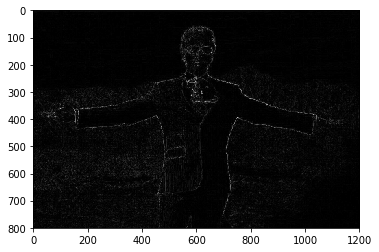

The average per-pixel error for tony is: 23.708120833333332
The maximum per-pixel error for tony is: 9640.0


In [45]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for tony is: "+str(pp_err))
print("The maximum per-pixel error for tony is: "+str(max_err))

In [46]:
mosaic_img = read_image(IMG_DIR + 'hope.bmp')[:,:,0]
soln_image = get_solution_image(mosaic_img)
# Generate your solution image here and show it 
cv2.imshow('hope solution', soln_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Freeman's Method

For details of the freeman's method refer to the class assignment webpage.

__MAKE SURE YOU FINISH LINEAR INTERPOLATION BEFORE STARTING THIS PART!!!__

In [47]:
def get_freeman_solution_image(mosaic_img):
    '''
    This function should return the freeman soln image.
    Feel free to write helper functions in the above cells
    as well as change the parameters of this function.

    HINT : Use the above get_solution_image function.
    '''
    ### YOUR CODE HERE ###
    freeman_soln_image = \
    get_solution_image(mosaic_img).transpose((2, 0, 1)).astype(np.dtype('float32'))
    freeman_soln_image[0] = \
    medfilt2d(freeman_soln_image[0] - freeman_soln_image[1]) + freeman_soln_image[1]
    freeman_soln_image[2] = \
    medfilt2d(freeman_soln_image[2] - freeman_soln_image[1]) + freeman_soln_image[1]
    freeman_soln_image = \
    freeman_soln_image.transpose((1, 2, 0))
    freeman_soln_image[freeman_soln_image<0], \
    freeman_soln_image[freeman_soln_image>255] = 0, 255
    return freeman_soln_image.astype(np.dtype('uint8'))

In [48]:
mosaic_img = read_image(IMG_DIR + 'tony.bmp')[:,:,0]
soln_image = get_freeman_solution_image(mosaic_img)
original_image = read_image(IMG_DIR + 'tony.jpg')
# For sanity check display your solution image here
### YOUR CODE
cv2.imshow('tony freeman solution', soln_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[23  7 29 ...  4 10 32]
 [ 2 16  9 ...  2  1  4]
 [ 1  1  1 ...  1  1  5]
 ...
 [ 3  1  1 ...  0  0  0]
 [ 4  0  4 ...  0  0  0]
 [28  7  3 ...  0  0 15]]


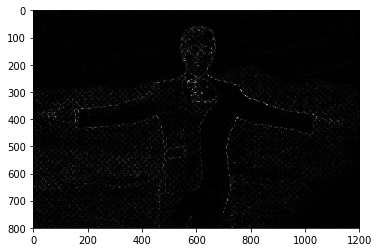

The average per-pixel error for tony is: 15.643215625
The maximum per-pixel error for tony is: 10753.0


In [49]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for tony is: "+str(pp_err))
print("The maximum per-pixel error for tony is: "+str(max_err))

[[51  1  1 ...  0  0 48]
 [ 1  1  2 ...  1  0  0]
 [ 1  1  1 ...  0  0  0]
 ...
 [ 1  1  2 ...  0  1  1]
 [ 7  2  1 ...  1  0  0]
 [26  8  2 ...  3  0 17]]


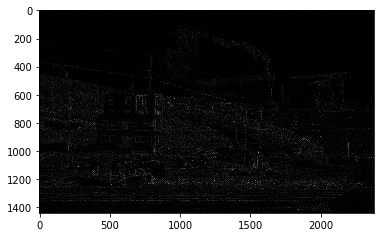

The average per-pixel error for iceberg is: 66.48477469913239
The maximum per-pixel error for iceberg is: 34075.0
[[14  2  2 ...  0  5 59]
 [ 3  2  2 ...  1  1  1]
 [ 4  2  0 ...  1  0  2]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [45  0  0 ...  0  0 46]]


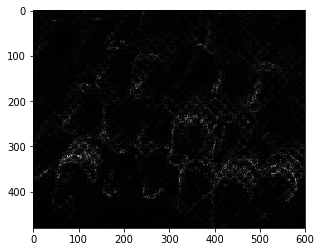

The average per-pixel error for crayons is: 100.54865277777778
The maximum per-pixel error for crayons is: 48173.0


In [50]:
### Feel free to play around with other images for Freeman's method above ###
mosaic_img = read_image(IMG_DIR + 'iceberg.bmp')[:,:,0]
soln_image = get_freeman_solution_image(mosaic_img)
original_image = read_image(IMG_DIR + 'iceberg.jpg')
# For sanity check display your solution image here
### YOUR CODE
cv2.imshow('iceberg freeman solution', soln_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for iceberg is: "+str(pp_err))
print("The maximum per-pixel error for iceberg is: "+str(max_err))


mosaic_img = read_image(IMG_DIR + 'crayons.bmp')[:,:,0]
soln_image = get_freeman_solution_image(mosaic_img)
original_image = read_image(IMG_DIR + 'crayons.jpg')
# For sanity check display your solution image here
### YOUR CODE
cv2.imshow('crayons freeman solution', soln_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for crayons is: "+str(pp_err))
print("The maximum per-pixel error for crayons is: "+str(max_err))


In [51]:
mosaic_img = read_image(IMG_DIR + 'hope.bmp')[:,:,0]
soln_image = get_freeman_solution_image(mosaic_img)
# Generate your solution image here and show it
cv2.imshow('hope freeman solution', soln_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Mosaicing an Image

Now lets take a step backwards and mosaic an image.

In [52]:
def get_mosaic_image(original_image):
    '''
    Generate the mosaic image using the Bayer Pattern.
    '''
    origin_shape = np.shape(original_image)

    # Make sure broadcast works correctly
    assert origin_shape[0] % 2 == 0 and origin_shape[1] % 2 == 0

    width_n = origin_shape[1] // 2
    height_n = origin_shape[0] // 2
    original_image = original_image.transpose((2, 0, 1))

    red_mask = np.tile(np.array([[1, 0], [0, 0]]), (height_n, width_n))
    green_mask = np.tile(np.array([[0, 1], [1, 0]]), (height_n, width_n))
    blue_mask = np.tile(np.array([[0, 0], [0, 1]]), (height_n, width_n))

    red_c = original_image[2] * red_mask
    green_c = original_image[1] * green_mask
    blue_c = original_image[0] * blue_mask

    mosaic_img = red_c + green_c + blue_c

    return mosaic_img

In [53]:
### YOU CAN USE ANY OF THE PROVIDED IMAGES TO CHECK YOUR get_mosaic_function

Use any 3 images you find interesting and generate their mosaics as well as their demosaics. Try to find images that break your demosaicing function.

[[2 1 1 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 0 4]
 [0 0 0 ... 0 2 6]]


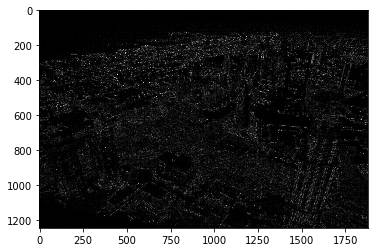

The average per-pixel error for city is: 445.62588766504757
The maximum per-pixel error for city is: 67498.0


In [54]:
### YOUR CODE HERE ###
origin_img = read_image(IMG_DIR + 'city.jpeg')
mosaic_img = get_mosaic_image(origin_img)
mosaic_img = get_solution_image(mosaic_img)
cv2.imshow('city freeman solution', mosaic_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
(pp_err, max_err) = compute_errors(mosaic_img, origin_img)
print("The average per-pixel error for city is: "+str(pp_err))
print("The maximum per-pixel error for city is: "+str(max_err))


[[21 10  3 ...  2  1  1]
 [ 5  1  4 ...  1  2  4]
 [ 3  4  3 ...  1  1  1]
 ...
 [ 3  3  2 ...  8  7  8]
 [ 0  3  5 ...  7  5  7]
 [ 4  1  3 ...  7  5  6]]


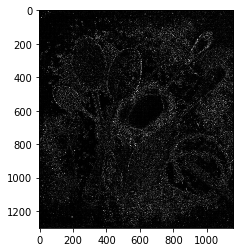

The average per-pixel error for seasons is: 435.1644350132626
The maximum per-pixel error for seasons is: 54290.0


In [55]:
origin_img = read_image(IMG_DIR + 'seasons.jpeg')
mosaic_img = get_mosaic_image(origin_img)
mosaic_img = get_solution_image(mosaic_img)
cv2.imshow('seasons freeman solution', mosaic_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
(pp_err, max_err) = compute_errors(mosaic_img, origin_img)
print("The average per-pixel error for seasons is: "+str(pp_err))
print("The maximum per-pixel error for seasons is: "+str(max_err))

[[ 3  1  3 ...  1  2  2]
 [ 4  0  1 ...  1  1  2]
 [ 5  1  1 ...  1  1  1]
 ...
 [ 4  4  5 ...  7 11 19]
 [ 4  1  4 ...  9 12  8]
 [ 9  9  9 ...  2 13 18]]


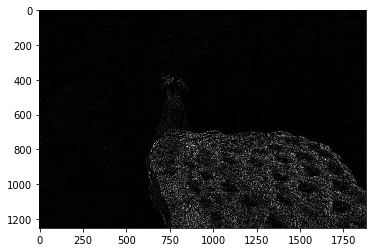

The average per-pixel error for peacock is: 241.8647814560533
The maximum per-pixel error for peacock is: 32201.0


In [56]:
origin_img = read_image(IMG_DIR + 'peacock.jpeg')
mosaic_img = get_mosaic_image(origin_img)
mosaic_img = get_solution_image(mosaic_img)
cv2.imshow('peacock freeman solution', mosaic_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
(pp_err, max_err) = compute_errors(mosaic_img, origin_img)
print("The average per-pixel error for peacock is: "+str(pp_err))
print("The maximum per-pixel error for peacock is: "+str(max_err))

### Bonus Points

In [57]:
### YOUR CODE HERE ###
### YOU ARE ON YOUR OWN :) ####

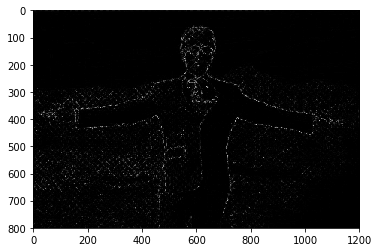

The average per-pixel error for tony is: 8.999601041666667
The maximum per-pixel error for tony is: 597


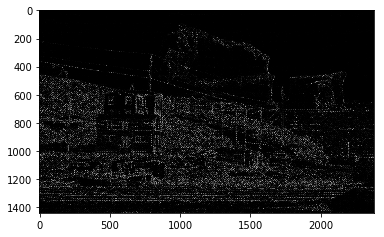

The average per-pixel error for iceberg is: 29.3947479359082
The maximum per-pixel error for iceberg is: 675


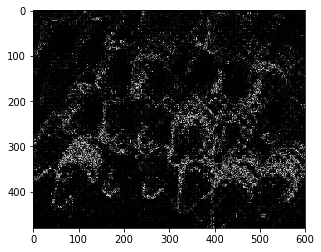

The average per-pixel error for crayons is: 32.299368055555554
The maximum per-pixel error for crayons is: 490


In [58]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import correlate as conv
from scipy.signal import medfilt2d
IMG_DIR = 'images/'

def read_image(IMG_NAME):
    # YOUR CODE HERE
    img = cv2.imread(IMG_NAME)
    return img


def compute_errors(soln_image, original_image):
    '''
    Compute the Average and Maximum per-pixel error
    for the image.

    Also generate the map of pixel differences
    to visualize where the mistakes are made
    '''
    err_map = ((soln_image - original_image) ** 2).sum(2)
    # print(err_map)
    plt.imshow(err_map, 'gray')
    plt.show()
    size = np.shape(err_map)[0] * np.shape(err_map)[1]
    pp_err = err_map.sum() / size
    max_err = err_map.max()
    return pp_err, max_err


def get_freeman_solution_image(mosaic_img):
    '''
    This function should return the freeman soln image.
    Feel free to write helper functions in the above cells
    as well as change the parameters of this function.

    HINT : Use the above get_solution_image function.
    '''
    ### YOUR CODE HERE ###
    mosaic_shape = np.shape(mosaic_img)
    # soln_image = np.zeros((mosaic_shape[0], mosaic_shape[1], 3))
    ### YOUR CODE HERE ###

    # Make sure broadcast works correctly
    assert mosaic_shape[0] % 2 == 0 and mosaic_shape[1] % 2 == 0
    width_n = mosaic_shape[1] // 2
    height_n = mosaic_shape[0] // 2

    red_mask = np.tile(np.array([[1, 0], [0, 0]]), (height_n, width_n))
    green_mask = np.tile(np.array([[0, 1], [1, 0]]), (height_n, width_n))
    blue_mask = np.tile(np.array([[0, 0], [0, 1]]), (height_n, width_n))

    # Extract channels
    red_channel = mosaic_img * red_mask
    green_channel = mosaic_img * green_mask
    blue_channel = mosaic_img * blue_mask

    # Do conv for each channel
    green_out = conv(green_channel, np.array([[0, 0.25, 0], \
                                              [0.25, 1, 0.25], [0, 0.25, 0]]),
                         output=np.dtype('float32'), mode='mirror')
    red_out = medfilt2d(conv(red_channel, np.array([[0.25, 0.5, 0.25], \
                                                    [0.5, 1, 0.5], [0.25, 0.5, 0.25]]),
                       output=np.dtype('float32'), mode='mirror') - green_out)
    blue_out = medfilt2d(conv(blue_channel, np.array([[0.25, 0.5, 0.25], \
                                                      [0.5, 1, 0.5], [0.25, 0.5, 0.25]]),
                        output=np.dtype('float32'), mode='mirror') - green_out)
    red_out = (red_out + green_out) * (1 - red_mask) + red_channel
    blue_out = (blue_out + green_out) * (1 - blue_mask) + blue_channel

    freeman_soln_image = \
    np.array([blue_out, green_out, red_out]).transpose((1, 2, 0))
    freeman_soln_image[freeman_soln_image<0], \
    freeman_soln_image[freeman_soln_image>255] = 0, 255
    return freeman_soln_image.astype(np.dtype('uint8'))


mosaic_img = read_image(IMG_DIR + 'tony.bmp')[:,:,0]
mosaic_img = get_freeman_solution_image(mosaic_img)

cv2.imshow('tony with improved freeman', mosaic_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

origin_img = read_image(IMG_DIR + 'tony.jpg')
(pp_err, max_err) = compute_errors(mosaic_img, origin_img)

print("The average per-pixel error for tony is: "+str(pp_err))
print("The maximum per-pixel error for tony is: "+str(max_err))


mosaic_img = read_image(IMG_DIR + 'iceberg.bmp')[:,:,0]
mosaic_img = get_freeman_solution_image(mosaic_img)

cv2.imshow('iceberg with improved freeman', mosaic_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

origin_img = read_image(IMG_DIR + 'iceberg.jpg')
(pp_err, max_err) = compute_errors(mosaic_img, origin_img)

print("The average per-pixel error for iceberg is: "+str(pp_err))
print("The maximum per-pixel error for iceberg is: "+str(max_err))


mosaic_img = read_image(IMG_DIR + 'crayons.bmp')[:,:,0]
mosaic_img = get_freeman_solution_image(mosaic_img)

cv2.imshow('crayons with improved freeman', mosaic_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

origin_img = read_image(IMG_DIR + 'crayons.jpg')
(pp_err, max_err) = compute_errors(mosaic_img, origin_img)

print("The average per-pixel error for crayons is: "+str(pp_err))
print("The maximum per-pixel error for crayons is: "+str(max_err))